In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
demograpgics = pd.read_csv('datasets/exam-1/demographics.csv')
cc = pd.read_csv('datasets/exam-1/cc.csv')
cc.sort_values(by=['cc_no', 'pos_dt'], inplace=True)
kplus = pd.read_csv('datasets/exam-1/kplus.csv')
kplus.sort_values(by=['id', 'sunday'], inplace=True)
train_set = pd.read_csv('datasets/exam-1/train.csv')
test_set = pd.read_csv('datasets/exam-1/test.csv')
cc_persons = pd.read_csv('datasets/exam-1/cc_persons.csv')

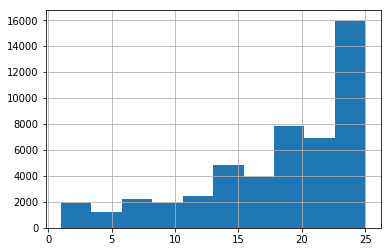

In [8]:
kplus.groupby(['id']).count()['sunday'].hist()

In [9]:
from scipy import stats
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


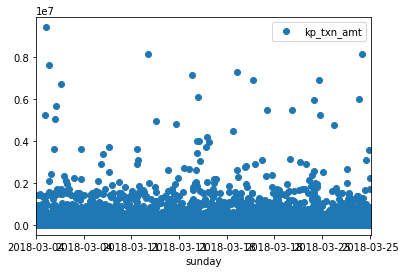

In [10]:
kplus_in_march = kplus[(kplus['sunday'] > '2018-03-01') & (kplus['sunday'] < '2018-03-31')]
kplus_in_march.sort_values(['sunday'], inplace=True)

kplus_in_march.plot(x='sunday', y='kp_txn_amt', style='o')

In [11]:
kplus_in_march.describe()

,id,kp_txn_count,kp_txn_amt
count,140427.000000,140427.000000,1.404270e+05
mean,32204.311635,4.341081,2.876084e+04
std,18721.126620,5.836493,1.276750e+05
min,2.000000,1.000000,1.000000e+02
25%,15956.000000,2.000000,1.700000e+03
50%,32091.000000,3.000000,6.700000e+03
75%,48367.000000,5.000000,2.150000e+04
max,64999.000000,321.000000,9.428100e+06


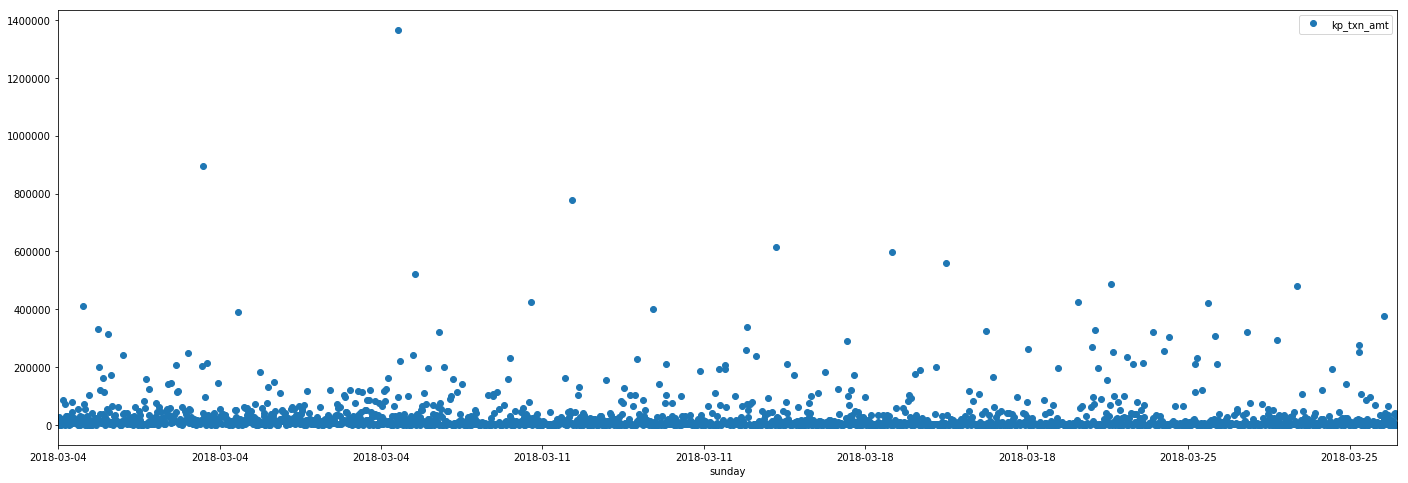

In [12]:
trend = kplus_in_march[kplus_in_march['id'] < 1000]
trend.plot(x='sunday', y='kp_txn_amt', style='o', figsize=(24,8))

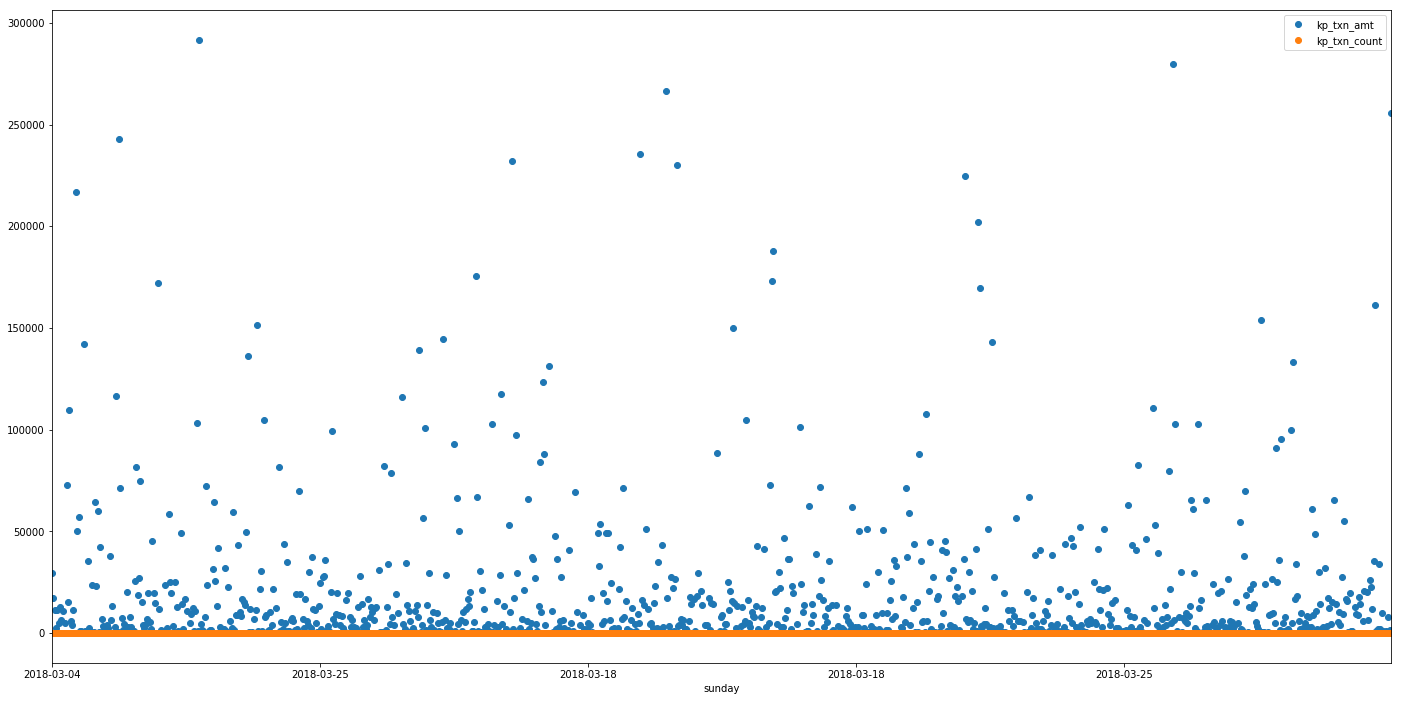

In [13]:
trend = kplus_in_march[(np.abs(stats.zscore(kplus_in_march['kp_txn_amt']) < 2.5))]

trend = trend.sample(1000)

trend.plot(x='sunday', y=['kp_txn_amt', 'kp_txn_count'], style='o', figsize=(24,12))

## Money spent on kplus trend each month

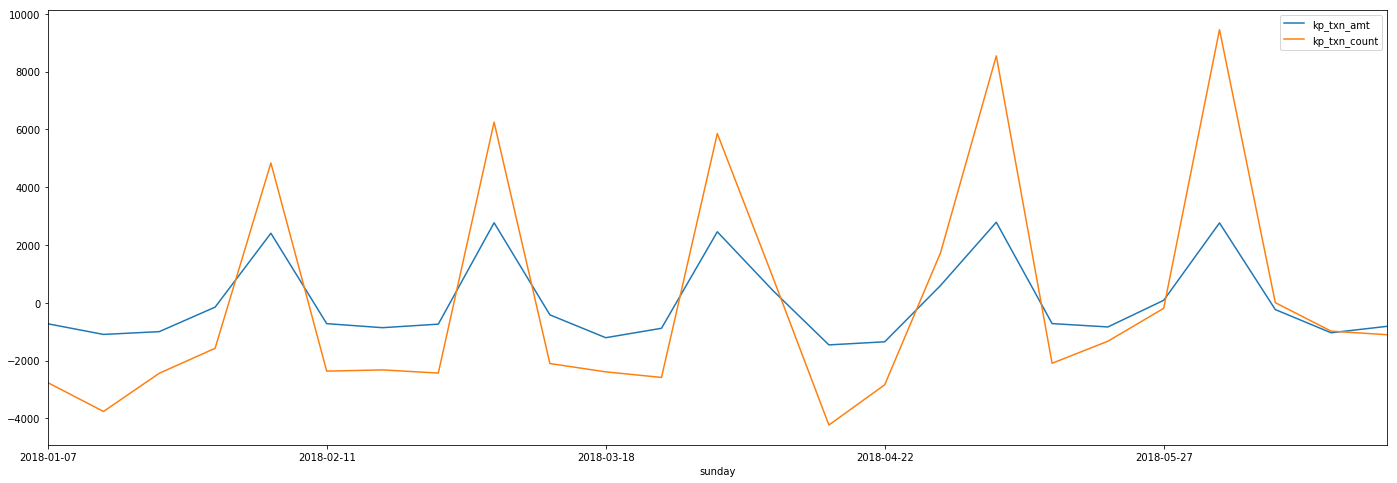

In [26]:
trend = kplus.copy()
stardardizes = ['kp_txn_amt', 'kp_txn_count']
for col in stardardizes:
    trend[col] = (trend[col] - trend[col].mean()) / trend[col].std()

trend.groupby('sunday').sum().sort_values(by=['sunday']).plot(y=['kp_txn_amt', 'kp_txn_count'], figsize=(24,8))


In [13]:
kplus_in_march = kplus[(kplus['sunday'] >= '2018-03-01') & (kplus['sunday'] <= '2018-03-31')]
kplus_in_march.sort_values(['sunday'], inplace=True)
kplus_in_march = pd.merge(kplus_in_march, train_set, on='id')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
lower_income_kplus = kplus_in_march[kplus_in_march['income'] < 30000]
higher_income_kplus = kplus_in_march[kplus_in_march['income'] >= 100000]

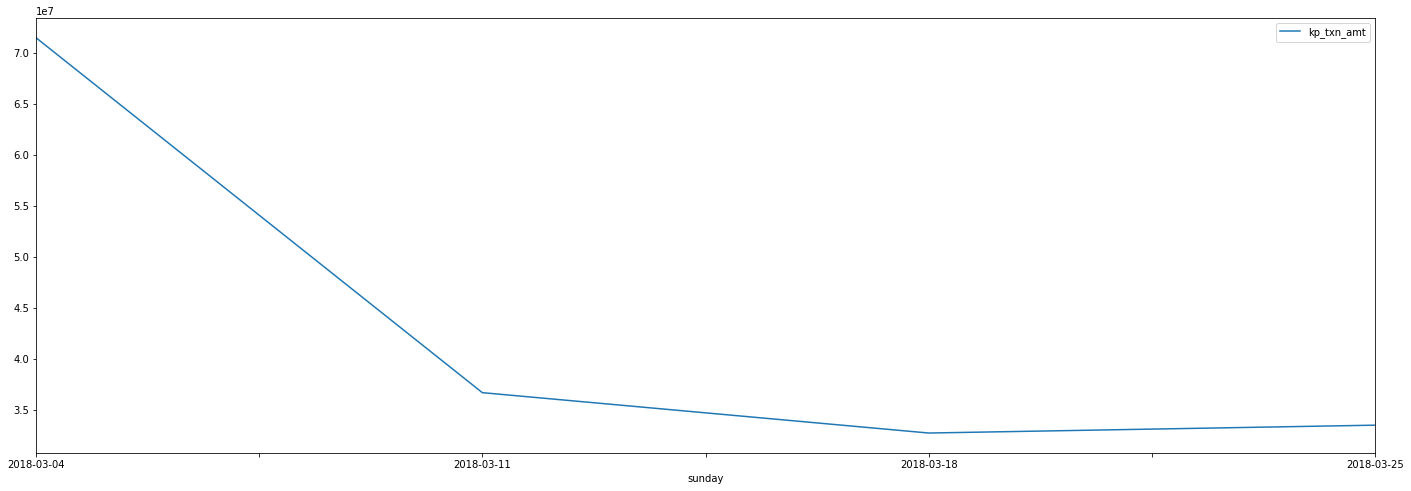

In [35]:
lower_income_kplus.sample(10000).groupby(by='sunday').sum().plot( y='kp_txn_amt', figsize = (24,8))

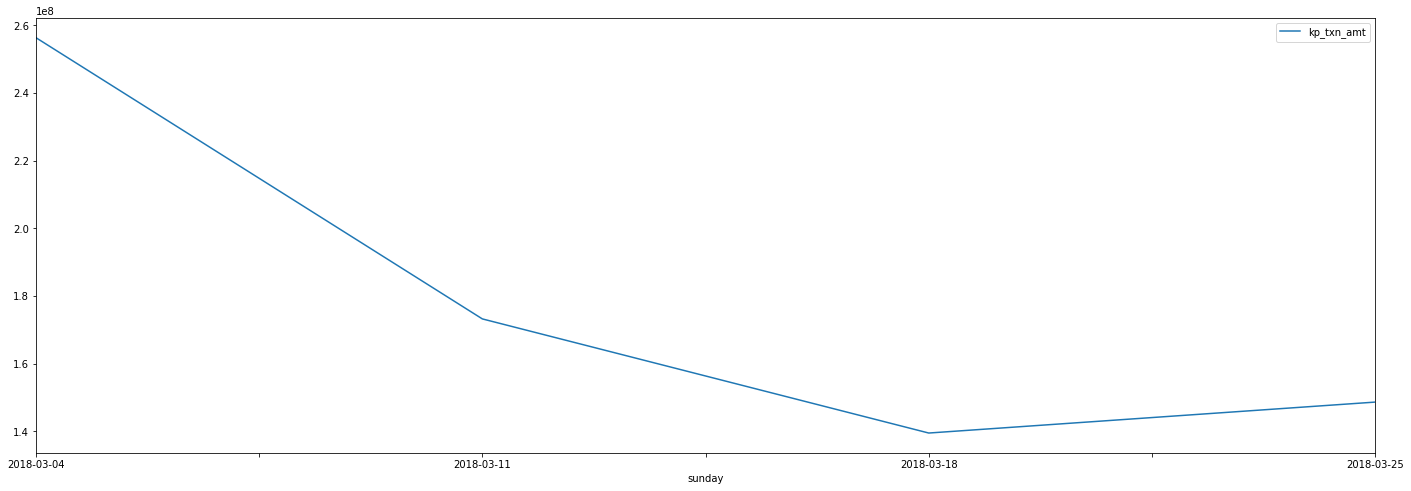

In [36]:
higher_income_kplus.sample(10000).groupby(by='sunday').sum().plot( y='kp_txn_amt', figsize = (24,8))

## Credit trend

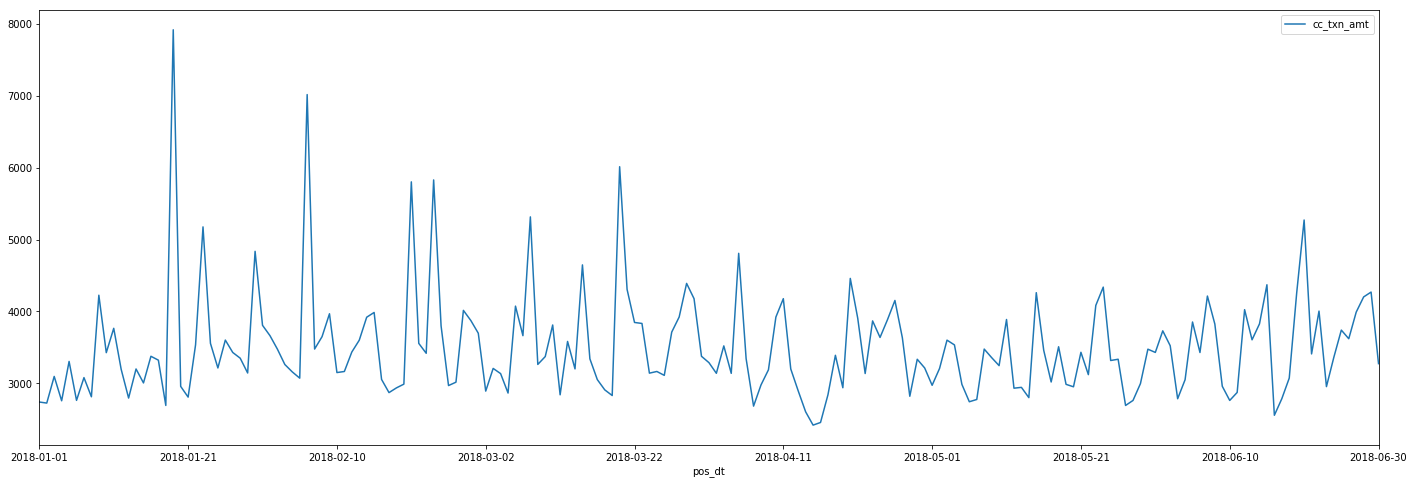

In [5]:
trend = cc.copy()
# stardardizes = ['cc_txn_amt']
# for col in stardardizes:
#     trend[col] = (trend[col] - trend[col].mean()) / trend[col].std()

trend.groupby('pos_dt').mean().sort_values(by=['pos_dt']).plot(y=['cc_txn_amt'], figsize=(24,8),)


In [6]:
# cc_in_march = cc[(cc['pos_dt'] >= '2018-03-01') & (cc['pos_dt'] <= '2018-03-31')]
# cc_in_march.sort_values(by='pos_dt', inplace=True)
cc_and_income = pd.merge(cc, pd.merge(demograpgics, train_set, on='id')[['cc_no','id','income']], on='cc_no',)


In [7]:
cc_and_income.head(10)

,cc_no,pos_dt,cc_txn_amt,id,income
0,2,2018-03-10,800,2,106000
1,2,2018-03-12,3800,2,106000
2,2,2018-04-27,14700,2,106000
3,2,2018-04-29,4000,2,106000
4,2,2018-05-07,800,2,106000
5,2,2018-05-14,800,2,106000
6,2,2018-06-04,1000,2,106000
7,2,2018-06-11,1000,2,106000
8,4,2018-05-11,20000,4,61000
9,4,2018-05-11,30000,4,61000


In [8]:
total_cc_spent_each_day = cc_and_income.groupby(['id', 'pos_dt']).sum()
total_cc_spent_each_day.head(10)

cc_no  cc_txn_amt  income
id pos_dt                                
1  2018-01-20   98397        4700   20000
   2018-02-17  196794       20000   40000
   2018-05-13   98397       10000   20000
   2018-06-14   98397       10000   20000
2  2018-01-04    9740        1600  106000
   2018-01-28   29220        3500  318000
   2018-01-29    9740        1500  106000
   2018-02-04    9740        1100  106000
   2018-02-11    9740         800  106000
   2018-02-19    9740         800  106000

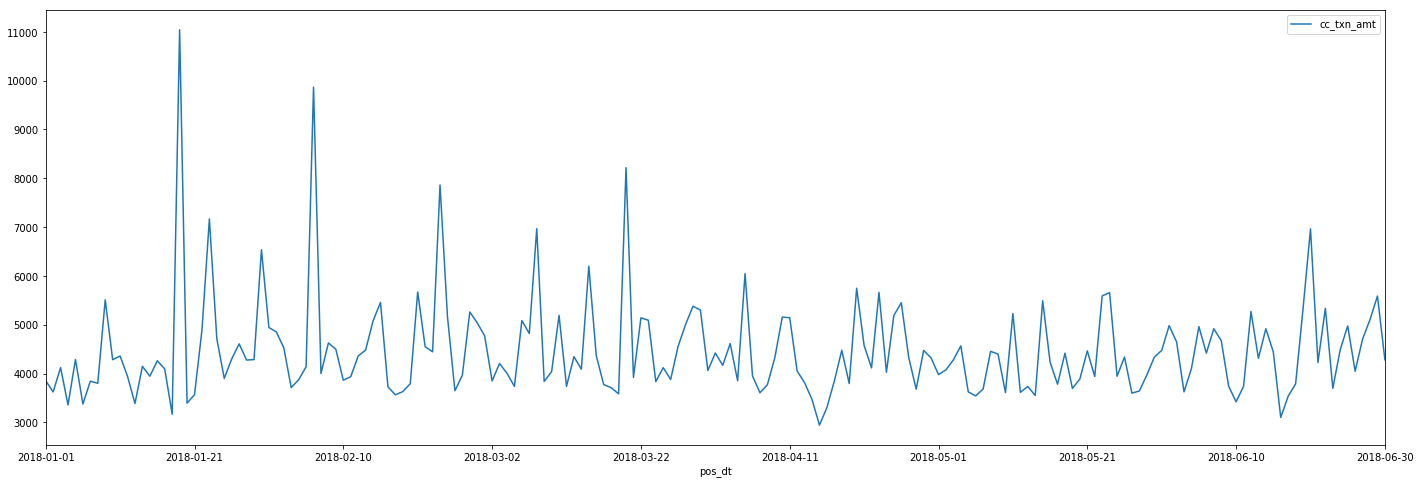

In [11]:
total_cc_spent_each_day.groupby('pos_dt').mean().plot(y='cc_txn_amt', figsize=(24,8))

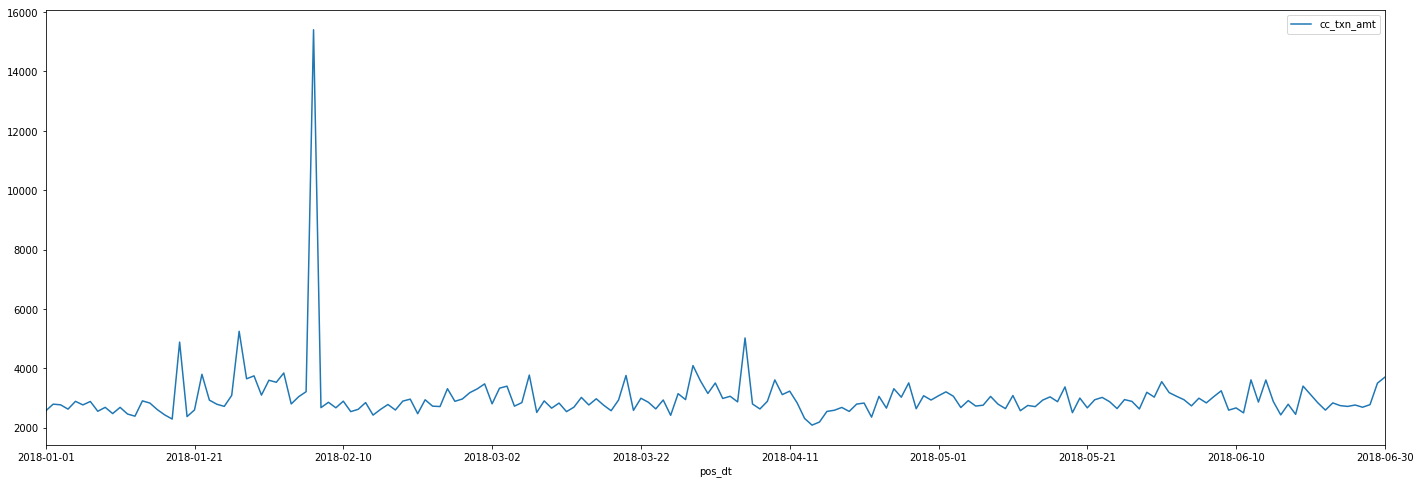

In [12]:
total_lower_cc_spent_each_day = cc_and_income[cc_and_income['income'] <= 30000].groupby(['id', 'pos_dt']).sum()
total_lower_cc_spent_each_day.groupby('pos_dt').mean().plot(y='cc_txn_amt', figsize=(24,8))

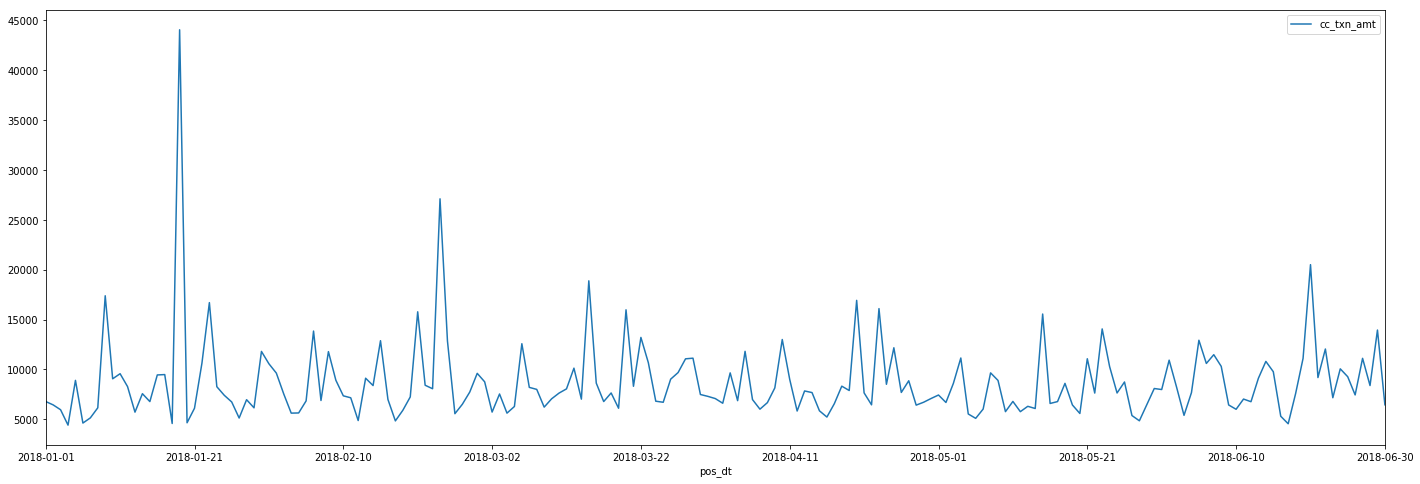

In [13]:
total_higher_cc_spent_each_day = cc_and_income[cc_and_income['income'] >= 100000].groupby(['id', 'pos_dt']).sum()
total_higher_cc_spent_each_day.groupby('pos_dt').mean().plot(y='cc_txn_amt', figsize=(24,8))

# OCP trend

In [10]:
pd.merge(demograpgics, train_set, on='id').groupby('ocp_cd')['income'].mean()

ocp_cd
1.0      37457.098284
2.0      67459.497207
3.0      49864.066484
4.0     109186.435523
5.0      60527.093596
6.0      36389.830508
7.0      63397.045245
8.0     105666.666667
9.0      40049.131053
11.0     88645.161290
12.0     71773.869347
13.0     63396.113602
Name: income, dtype: float64

In [16]:
cc_persons.head()

,Unnamed: 0,id,pos_dt,cc_no,cc_txn_amt,count,pos_dt_index
0,0,1,2018-01-20,98397,4700,1,19
1,1,1,2018-02-17,196794,20000,2,47
2,2,1,2018-05-13,98397,10000,1,132
3,3,1,2018-06-14,98397,10000,1,164
4,4,2,2018-01-04,9740,1600,1,3


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaled_cc_persons = cc_persons.copy()
scaled_cc_persons[['cc_txn_amt', 'count']] = scaler.fit_transform(scaled_cc_persons[['cc_txn_amt', 'count']])

In [35]:
scaled_cc_persons.head()

,Unnamed: 0,id,pos_dt,cc_no,cc_txn_amt,count,pos_dt_index
0,0,1,2018-01-20,98397,0.009926,-0.366991,19
1,1,1,2018-02-17,196794,0.421319,1.115008,47
2,2,1,2018-05-13,98397,0.152435,-0.366991,132
3,3,1,2018-06-14,98397,0.152435,-0.366991,164
4,4,2,2018-01-04,9740,-0.073428,-0.366991,3


In [36]:
grouped = pd.merge(scaled_cc_persons, demograpgics[['id', 'ocp_cd']], on='id').groupby(['ocp_cd', 'pos_dt'])

In [37]:
trend = grouped.mean().reset_index()

array([ 9.,  3.,  1., 13.,  4.,  7.,  6.,  5.,  2., 12.,  8., 11.])

In [56]:
trend[trend['ocp_cd'] == float(11)]

,ocp_cd,pos_dt,Unnamed: 0,id,cc_no,cc_txn_amt,count,pos_dt_index


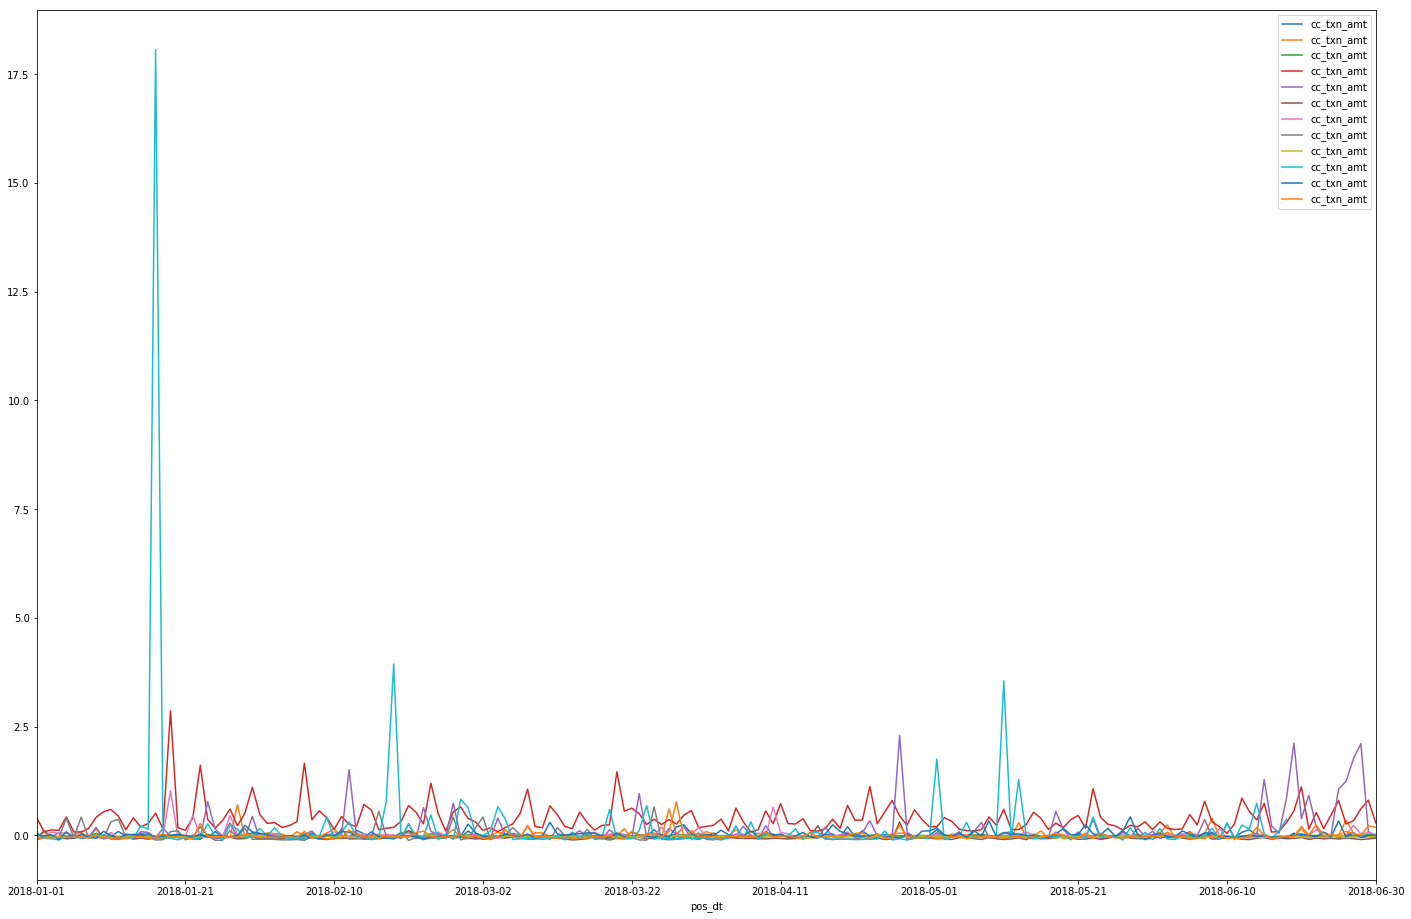

In [65]:
ax = plt.subplot()
for i in demograpgics['ocp_cd'].drop_duplicates().dropna().sort_values().to_numpy():
    ax = trend[trend['ocp_cd'] == float(i)].plot(x='pos_dt', y=['cc_txn_amt'], figsize=(24,16), ax=ax, )